In [1]:
# %pip install geopandas --user

In [2]:
# install needed packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
# load data for case count
# source: https://data.cdc.gov/Case-Surveillance/Weekly-United-States-COVID-19-Cases-and-Deaths-by-/pwn4-m3yp/data
df_count = pd.read_csv('Weekly_United_States_COVID-19_Cases_and_Deaths_by_State.csv')
df_count.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0


In [4]:
# load data for case rate
# source: https://covid.cdc.gov/covid-data-tracker/#cases_newcaserateper100k
df_rate = pd.read_csv('united_states_covid19_cases_deaths_and_testing_by_state.csv')
df_rate.head()

,State/Territory,Total Cases,New Cases in Past Week,Case Rate per 100000,Total Deaths,New Deaths in Past Week,Death Rate per 100000,Weekly Cases Rate per 100000,Weekly Death Rate per 100000,Total % Positive,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days
0,Alabama,1540329.0,6042.0,31415.0,20608.0,50.0,420.0,123.2,1.0,10-14.9%,3-4.9%,3-4.9%,174217.4794,8574169.0,934.20,45977.0,3343.57,164555.0
1,Alaska,285355.0,199.0,39007.0,1376.0,0.0,188.0,27.2,0.0,8-9.9%,5-7.9%,5-7.9%,636623.2743,4654722.0,849.61,6212.0,3889.45,28438.0
2,American Samoa,8257.0,0.0,17423.0,34.0,0.0,71.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,2300375.0,7360.0,31604.0,31613.0,40.0,434.0,101.1,0.6,10-14.9%,15-19.9%,15-19.9%,211667.5275,15708696.0,272.36,20213.0,1171.61,86950.0
4,Arkansas,962764.0,2133.0,31903.0,12523.0,17.0,414.0,70.7,0.6,10-14.9%,5-7.9%,5-7.9%,171149.0298,5186709.0,420.36,12739.0,1673.67,50721.0


In [5]:
# select just state and case rate columns
df2_rate = df_rate[['State/Territory','Weekly Cases Rate per 100000']]

In [6]:
df2_rate['State/Territory'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Federated States of Micronesia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York City',
       'New York*', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Palau',
       'Pennsylvania', 'Puerto Rico', 'Republic of Marshall Islands',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States of America', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
# remove * from New York
df2_rate['State/Territory'] = df2_rate['State/Territory'].str.replace("*","")

<ipython-input-7-b30173f670b8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2_rate['State/Territory'] = df2_rate['State/Territory'].str.replace("*","")
<ipython-input-7-b30173f670b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rate['State/Territory'] = df2_rate['State/Territory'].str.replace("*","")


In [8]:
# creat year column for case count df
df_count['year'] = df_count['date_updated'].str[0:4]

In [9]:
# only use 2022 data
df2_count = df_count[df_count['year'] == '2022']

In [10]:
# drop columns not needed
df2_count = df2_count.drop(['date_updated','start_date', 'end_date', 'tot_cases', 'tot_deaths','new_deaths'], axis=1)

In [11]:
# aggregate by state
df2_count = df2_count.groupby('state').sum().reset_index()

In [12]:
df2_count.head()

,state,new_cases
0,AK,132992
1,AL,660022
2,AR,395175
3,AS,8246
4,AZ,932295


In [13]:
# rename column for clarity
df2_count = df2_count.rename(columns={'new_cases': 'tot_new_cases_2022'})

In [14]:
# set the filepath and load in a shapefile
map_df = gpd.read_file("cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [15]:
# Remove American Samoa (AS), Guam (GU), Mariana Islands (MP), Virgin Islands (VI) and Puerto Rico (PR)
map1 = map_df[map_df["STUSPS"] != "AS"]
map2 = map1[map1["STUSPS"] != "GU"]
map3 = map2[map2["STUSPS"] != "MP"]
map4 = map3[map3["STUSPS"] != "PR"]
map5 = map4[map4["STUSPS"] != "VI"]
map5

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [16]:
# make it just the 48 states
map6 = map5[map5["STUSPS"] != "HI"]
map7 = map6[map6["STUSPS"] != "AK"]
map8 = map7[map7["STUSPS"] != "DC"]
map8.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


<AxesSubplot:>

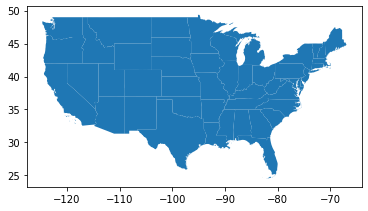

In [17]:
# confirm that map plots as expected
map8.plot()

In [18]:
# join the geodataframe with the excel-generated dataframe
joined = map8.set_index('STUSPS').join(df2_count.set_index('state'))
joined.head()

,STATEFP,STATENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,tot_new_cases_2022
STUSPS,,,,,,,,,,
NE,31,01779792,0400000US31,31,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",201067
WA,53,01779804,0400000US53,53,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",995114
NM,35,00897535,0400000US35,35,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",285800
SD,46,01785534,0400000US46,46,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",87496
TX,48,01779801,0400000US48,48,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",3494612


In [19]:
joined['tot_new_cases_2022'].sort_values(ascending=False).head()

STUSPS
CA    5989505
TX    3494612
FL    3307947
IL    1713577
NC    1581320
Name: tot_new_cases_2022, dtype: int64

In [20]:
joined.dtypes

STATEFP                 object
STATENS                 object
AFFGEOID                object
GEOID                   object
NAME                    object
LSAD                    object
ALAND                    int64
AWATER                   int64
geometry              geometry
tot_new_cases_2022       int64
dtype: object

In [21]:
# set variable for what we will visualize
variable = 'tot_new_cases_2022'

# set range for choropleth
var_min = joined['tot_new_cases_2022'].min()
var_max = joined['tot_new_cases_2022'].max()

vmin, vmax = var_min, var_max

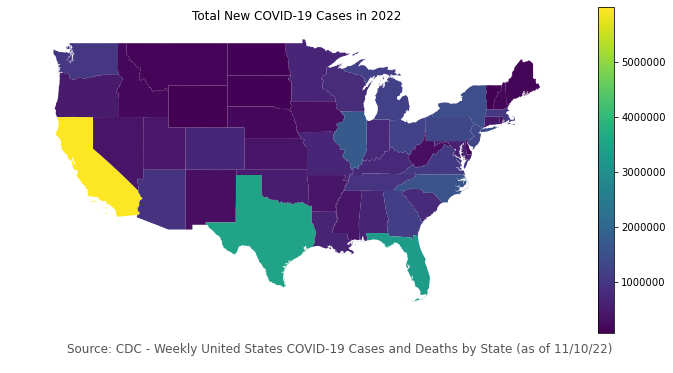

In [54]:
# plot map for 2022 case count
fig, ax = plt.subplots(1, figsize=(12, 6))
joined.plot(column = variable, linewidth = 0.8, ax=ax, legend=True,
            legend_kwds={'format':"%.0f"})

ax.set_title("Total New COVID-19 Cases in 2022")
ax.axis("off")
ax.annotate("Source: CDC - Weekly United States COVID-19 Cases and Deaths by State (as of 11/10/22)", xy = (0.1, 0.08),  
            xycoords = "figure fraction", horizontalalignment = "left", verticalalignment = "top", fontsize = 12, color = "#555555")

# Create colorbar as a legend
#sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm)

plt.savefig('tot_new_covid_cases_2022_by_state.png')

plt.show()

In [23]:
# join the geodataframe with the excel-generated dataframe
joined2 = map8.set_index('NAME').join(df2_rate.set_index('State/Territory'))
joined2.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,Weekly Cases Rate per 100000
NAME,,,,,,,,,,
Nebraska,31,01779792,0400000US31,31,NE,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",90.9
Washington,53,01779804,0400000US53,53,WA,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",60.3
New Mexico,35,00897535,0400000US35,35,NM,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",205.7
South Dakota,46,01785534,0400000US46,46,SD,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",98.5
Texas,48,01779801,0400000US48,48,TX,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",42.4


In [24]:
joined2['Weekly Cases Rate per 100000'].sort_values(ascending=False).head()

NAME
New Mexico      205.7
New Jersey      136.7
New York        129.2
North Dakota    126.9
Wisconsin       123.6
Name: Weekly Cases Rate per 100000, dtype: float64

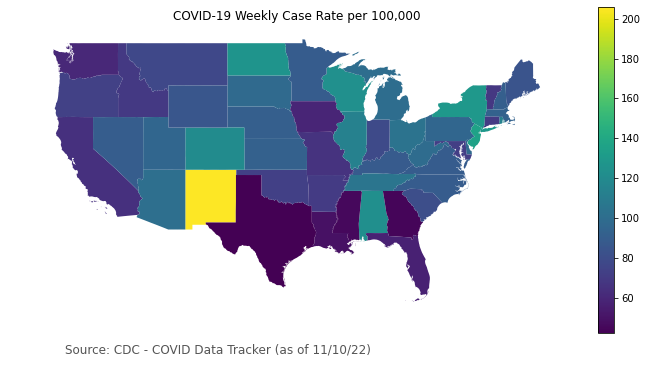

In [55]:
# plot the map for weekly case rate
fig, ax = plt.subplots(1, figsize=(12, 6))
joined2.plot(column = 'Weekly Cases Rate per 100000', linewidth = 0.8, ax=ax,
            legend=True,
            legend_kwds={'format':"%.0f"})
ax.axis("off")
ax.set_title("COVID-19 Weekly Case Rate per 100,000")
ax.axis("off")
ax.annotate("Source: CDC - COVID Data Tracker (as of 11/10/22)", xy = (0.1, 0.08),  
            xycoords = "figure fraction", horizontalalignment = "left", verticalalignment = "top", fontsize = 12, color = "#555555")

plt.savefig('weekly_case_rate_2022_by_state.png')

plt.show()